#### Add primary imports

In [134]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import pandas as pd


#### Read from CSV File

In [135]:
df = pd.read_csv("Clustering-Dataset.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Pre-processing

In [136]:
df = df.dropna()
df = df.reset_index(drop=True)
df['Gender'].replace({ 'Female' : 0 , 'Male' : 1 } ,inplace=True)
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending-Score"})
print(df.dtypes)
df 


CustomerID        int64
Gender            int64
Age               int64
Income            int64
Spending-Score    int64
dtype: object


,CustomerID,Gender,Age,Income,Spending-Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#### Data analysis

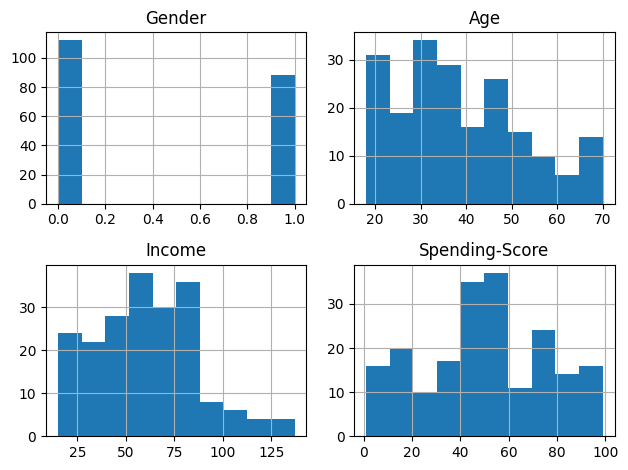

In [137]:
df.loc[:, df.columns != 'CustomerID'].hist()
plt.tight_layout()
plt.show()


#### Normalizing over the standard deviation


In [138]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

#### <span style="color: red;"> Modeling with K-Means Clustering

In [139]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet[:,1:])
labels = k_means.labels_
print(labels)


[1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 2 1 1 1 2 2 2 2 1 2 0 0 1 0 2 0 2 0 2 0 1 0 1 0 2 0 1 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0]


#### Assign the labels to each row in dataframe


In [140]:
df["Label"] = labels
df

,CustomerID,Gender,Age,Income,Spending-Score,Label
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0
198,199,1,32,137,18,0


In [141]:
df.groupby('Label').mean()


,CustomerID,Gender,Age,Income,Spending-Score
Label,,,,,
0,161.951220,0.463415,32.853659,87.341463,79.975610
1,61.650794,0.412698,25.142857,43.269841,56.507937
2,99.750000,0.447917,50.406250,60.468750,33.343750


I try Modeling whit Gender and whiteout it. when Gender is in machine directly grouped data 
by Gender and It reduced the effect of other components. Groping when use Gender in modeling:

|  Label |  CustomerID | Gender |  Age | Income |  Spending-Score |
|---|---|---|---|---|---|
| 0  | 104.364706  | 0.458824  |  28.047059 |61.788235  |  72.882353 |
| 1  | 92.560606   | 0.000000  |  45.075758 |57.727273  |  36.181818 |
| 2  | 104.489796  | 1.000000  |  49.204082 |62.244898  |  29.734694 |

as you see label 1 and 2 directly related to Gender.
so i remove this colum for modeling to remove its influence. 

#### Draw Scatter plot 

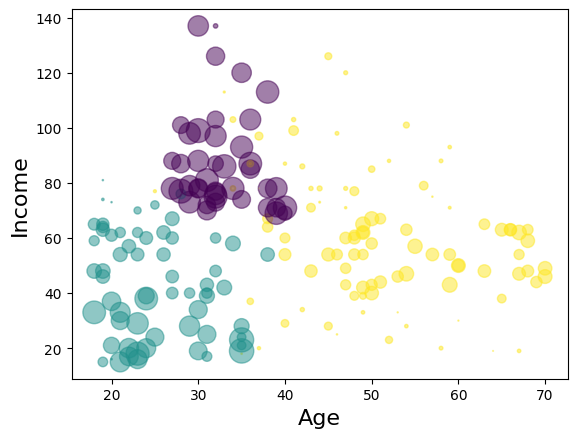

In [163]:
X = df.values
area = np.pi * ( X[:, 4])**2  
plt.scatter(X[:, 2], X[:, 3], s=area/100, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)

plt.show()


# Circle Area: Spending-Score
# Color: Purple--> label[0]    Green--> label[1]    Yellow--> Label[2]